In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

- Αρχικά θα εξετάσουμε τα δεδομένα μας ώστε να έχουμε μία ιδέα για το ποιά είναι τα βασικά στατιστικά στοιχεία που τα χαρακτηρίζουν, πως κατανέμονται κτλ.

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data = train_data.drop(columns=['type', 'song_id', 'uri',
                                     'track_href', 'analysis_url'], axis=1)
train_data

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.577   0.522    5    -6.594     0       0.0984        0.1300   
1             0.556   0.538    8    -5.408     0       0.0382        0.0689   
2             0.884   0.347    8    -8.227     0       0.3500        0.0150   
3             0.936   0.523    5    -6.710     1       0.0597        0.2390   
4             0.620   0.574    5    -7.788     0       0.0479        0.5690   
...             ...     ...  ...       ...   ...          ...           ...   
13875         0.798   0.627    9    -6.234     1       0.1110        0.2630   
13876         0.777   0.721    6    -6.097     1       0.0719        0.0774   
13877         0.913   0.788   10    -2.889     0       0.2630        0.0546   
13878         0.599   0.734    3    -7.568     0       0.4130        0.1960   
13879         0.740   0.595    1    -9.082     1       0.0623        0.4860   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.000090    0.1420    0.119  159.772       218320   
1              0.000000    0.1960    0.291  143.950       223347   
2              0.000007    0.0871    0.376   75.016       220307   
3              0.000000    0.1170    0.699  119.889       124056   
4              0.000000    0.1900    0.357  100.023       250173   
...                 ...       ...      ...      ...          ...   
13875          0.000000    0.2110    0.762  149.989       195947   
13876          0.000000    0.0801    0.665  161.976       205013   
13877          0.000640    0.1680    0.544  120.934       143314   
13878          0.000000    0.1870    0.133  211.842       223787   
13879          0.000000    0.1630    0.316  131.960       187273   

       time_signature  
0                   4  
1                   4  
2                   4  
3                   4  
4                   4  
...               ...  
13875               4  
13876               4  
13877               4  
13878               4  
13879               4  

[13880 rows x 13 columns]

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880 entries, 0 to 13879
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      13880 non-null  float64
 1   energy            13880 non-null  float64
 2   key               13880 non-null  int64  
 3   loudness          13880 non-null  float64
 4   mode              13880 non-null  int64  
 5   speechiness       13880 non-null  float64
 6   acousticness      13880 non-null  float64
 7   instrumentalness  13880 non-null  float64
 8   liveness          13880 non-null  float64
 9   valence           13880 non-null  float64
 10  tempo             13880 non-null  float64
 11  duration_ms       13880 non-null  int64  
 12  time_signature    13880 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.4 MB


In [4]:
train_data.describe()

danceability        energy           key      loudness          mode  \
count  13880.000000  13880.000000  13880.000000  13880.000000  13880.000000   
mean       0.687484      0.665706      5.353746     -6.299203      0.528746   
std        0.141409      0.161338      3.636216      2.395855      0.499191   
min        0.118000      0.005430      0.000000    -34.475000      0.000000   
25%        0.598000      0.566000      2.000000     -7.474250      0.000000   
50%        0.703000      0.680000      6.000000     -6.016500      1.000000   
75%        0.792000      0.784000      8.000000     -4.751000      1.000000   
max        0.980000      0.999000     11.000000      1.107000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  13880.000000  13880.000000      13880.000000  13880.000000   
mean       0.153771      0.248968          0.007918      0.182294   
std        0.130950      0.232287          0.060415      0.153279   
min        0.023100      0.000003          0.000000      0.019700   
25%        0.050100      0.058800          0.000000      0.096000   
50%        0.098300      0.177000          0.000000      0.122000   
75%        0.240000      0.380000          0.000014      0.210000   
max        0.966000      0.994000          0.960000      0.990000   

            valence         tempo   duration_ms  time_signature  
count  13880.000000  13880.000000  1.388000e+04    13880.000000  
mean       0.503586    122.342897  2.072196e+05        3.979035  
std        0.214521     28.106373  5.011249e+04        0.299734  
min        0.035400     46.489000  3.040000e+04        1.000000  
25%        0.341000     99.951000  1.776685e+05        4.000000  
50%        0.502000    121.940000  2.012645e+05        4.000000  
75%        0.668000    140.057250  2.286135e+05        4.000000  
max        0.982000    212.117000  1.109080e+06        5.000000

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

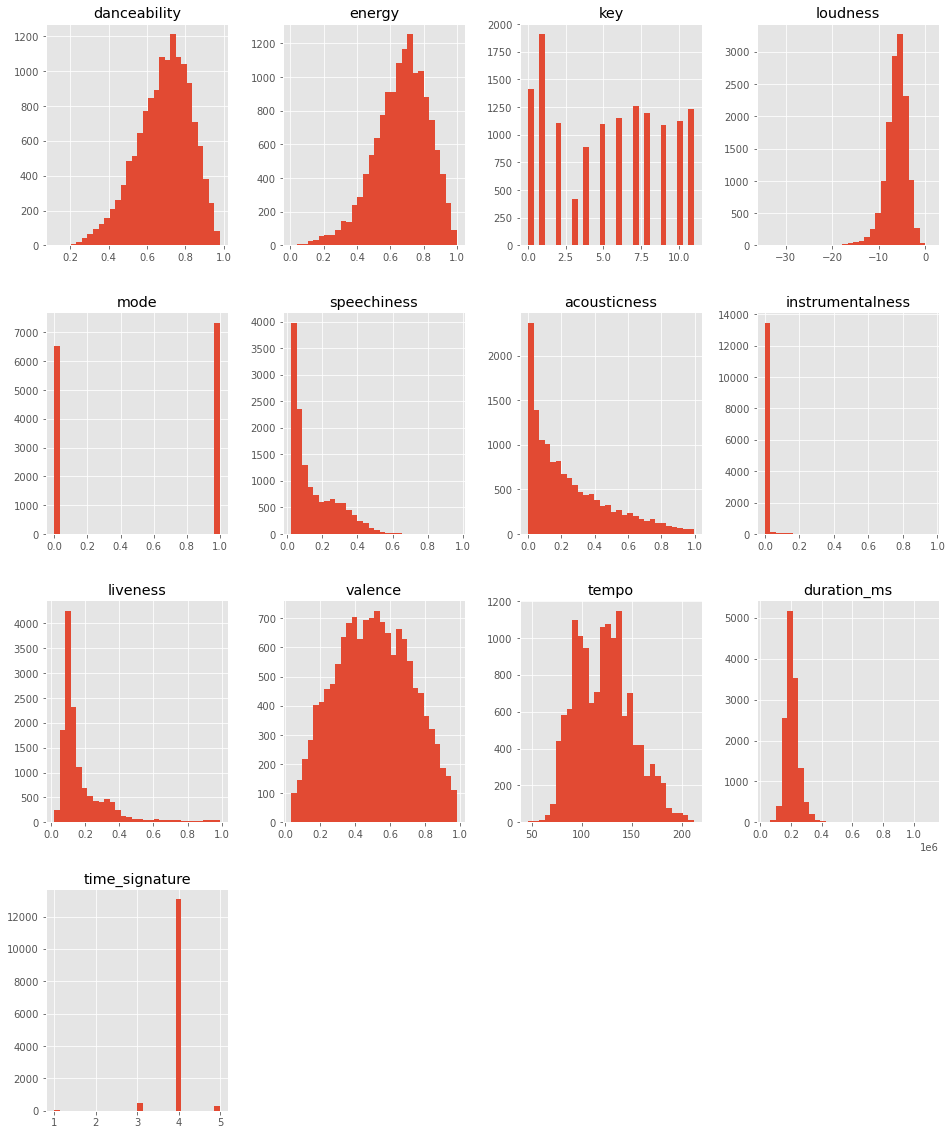

In [5]:
# multivariant analysis
# Not all distributions are the same
train_data.hist(figsize=(16,20), bins=30)

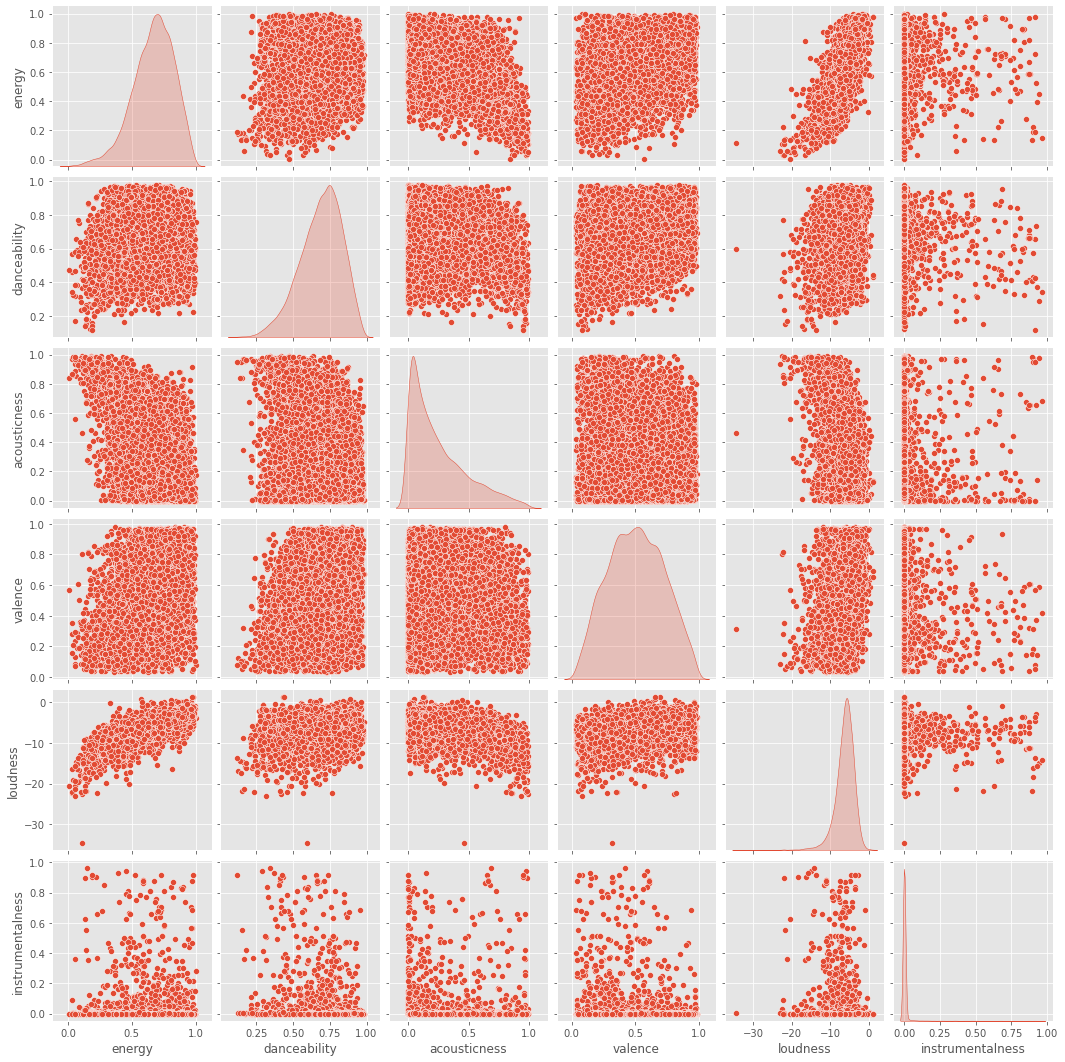

In [6]:
_ = sns.pairplot(train_data[['energy', 'danceability', 'acousticness', 'valence', 'loudness', 'instrumentalness']],
             diag_kind='kde')

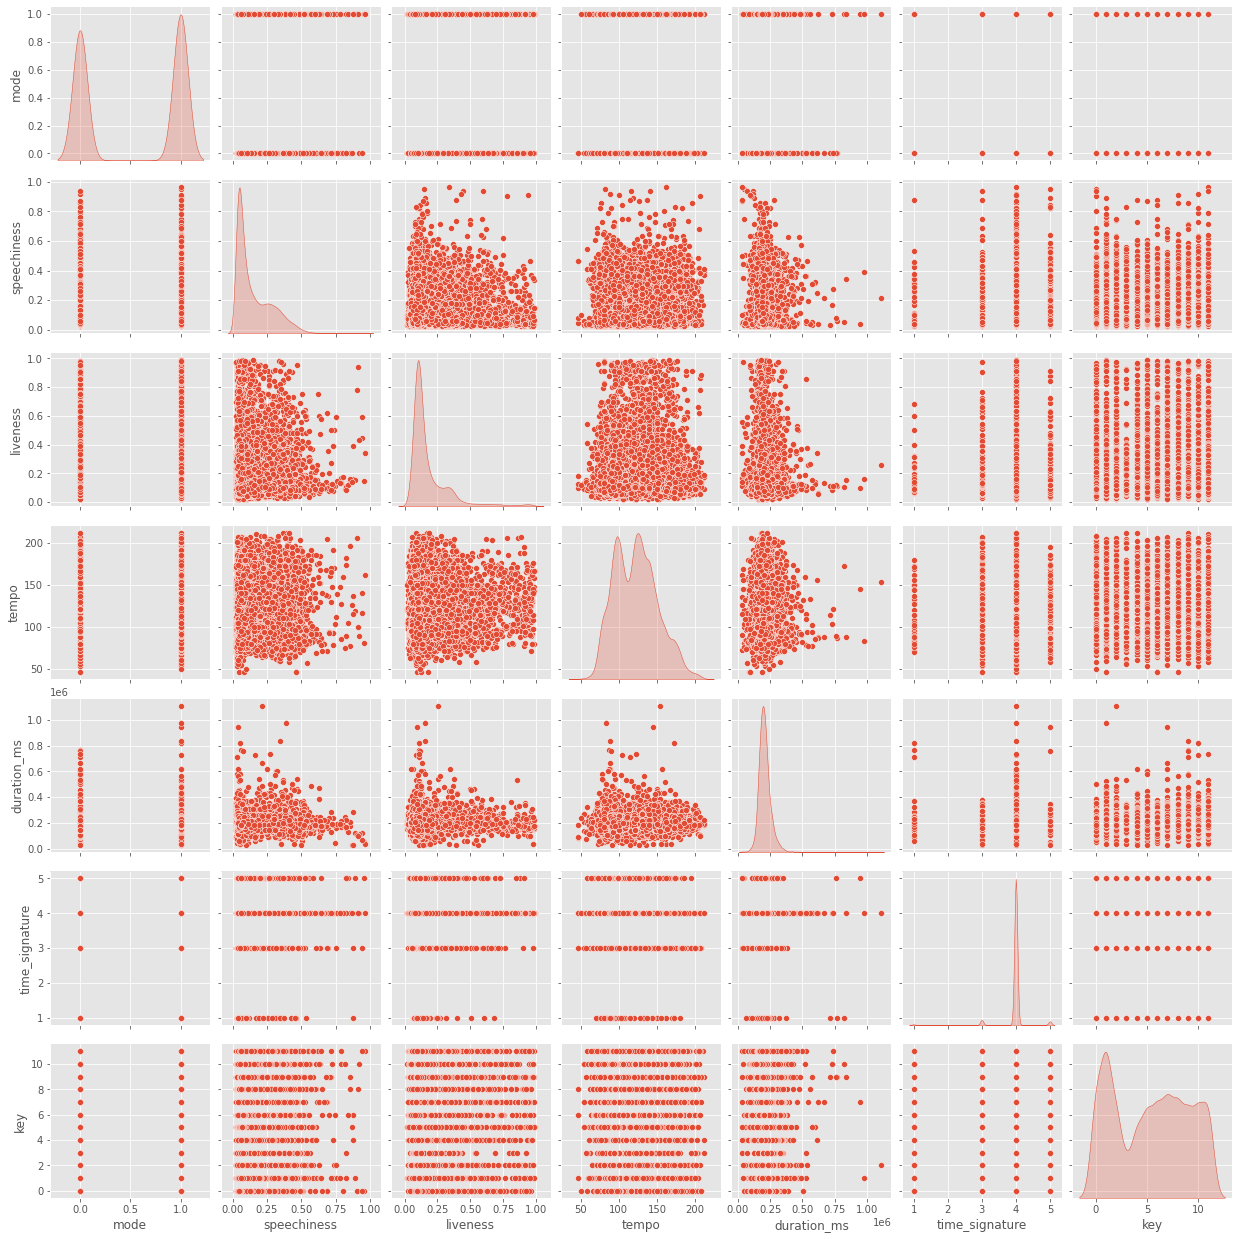

In [7]:
_ = sns.pairplot(train_data[['mode', 'speechiness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key']],
                 diag_kind='kde')

- Επίσης, θα δοκιμάσουμε διαφορετικούς scalers για να εξετάσουμε το πως επιδρούν στα δεδομένα μας.



- Αυτό θα μας βοηθήσει στις περιπτώσεις που πρέπει να κανονικοποιήσουμε τα δεδομένα μας πρώτα.

In [8]:
stand_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()


stand_scaler.fit(train_data)
minmax_scaler.fit(train_data)
robust_scaler.fit(train_data)

stand_scaled_data = stand_scaler.transform(train_data)
minmax_scaled_data = minmax_scaler.transform(train_data)
robust_scaled_data = robust_scaler.transform(train_data)


stand_scaled_data = pd.DataFrame(stand_scaled_data, columns=train_data.columns)
minmax_scaled_data = pd.DataFrame(minmax_scaled_data, columns=train_data.columns)
robust_scaled_data = pd.DataFrame(robust_scaled_data, columns=train_data.columns)

### Standard Scaler

In [9]:
stand_scaled_data.describe()

danceability        energy           key      loudness          mode  \
count  1.388000e+04  1.388000e+04  1.388000e+04  1.388000e+04  1.388000e+04   
mean  -9.585832e-16 -5.999484e-16 -3.254201e-16 -9.598470e-18  3.863592e-15   
std    1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00  1.000036e+00   
min   -4.027368e+00 -4.092643e+00 -1.472393e+00 -1.176065e+01 -1.059245e+00   
25%   -6.328256e-01 -6.180134e-01 -9.223508e-01 -4.904677e-01 -1.059245e+00   
50%    1.097306e-01  8.860271e-02  1.777333e-01  1.180010e-01  9.440688e-01   
75%    7.391353e-01  7.332349e-01  7.277754e-01  6.462241e-01  9.440688e-01   
max    2.068664e+00  2.065888e+00  1.552839e+00  3.091369e+00  9.440688e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  1.388000e+04  1.388000e+04      1.388000e+04  1.388000e+04   
mean  -3.747403e-17 -8.509044e-17      2.601705e-15  7.702772e-17   
std    1.000036e+00  1.000036e+00      1.000036e+00  1.000036e+00   
min   -9.979073e-01 -1.071835e+00     -1.310714e-01 -1.060808e+00   
25%   -7.917140e-01 -8.187046e-01     -1.310714e-01 -5.630056e-01   
50%   -4.236207e-01 -3.098332e-01     -1.310714e-01 -3.933743e-01   
75%    6.585125e-01  5.641167e-01     -1.308380e-01  1.807623e-01   
max    6.202822e+00  3.207492e+00      1.575970e+01  5.269701e+00   

            valence         tempo   duration_ms  time_signature  
count  1.388000e+04  1.388000e+04  1.388000e+04    1.388000e+04  
mean  -3.291555e-16  6.221808e-17 -6.599148e-16    3.197136e-15  
std    1.000036e+00  1.000036e+00  1.000036e+00    1.000036e+00  
min   -2.182550e+00 -2.698912e+00 -3.528580e+00   -9.939273e+00  
25%   -7.579292e-01 -7.967127e-01 -5.897155e-01    6.994918e-02  
50%   -7.392651e-03 -1.433525e-02 -1.188380e-01    6.994918e-02  
75%    7.664524e-01  6.302838e-01  4.269338e-01    6.994918e-02  
max    2.230232e+00  3.194199e+00  1.799737e+01    3.406357e+00

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

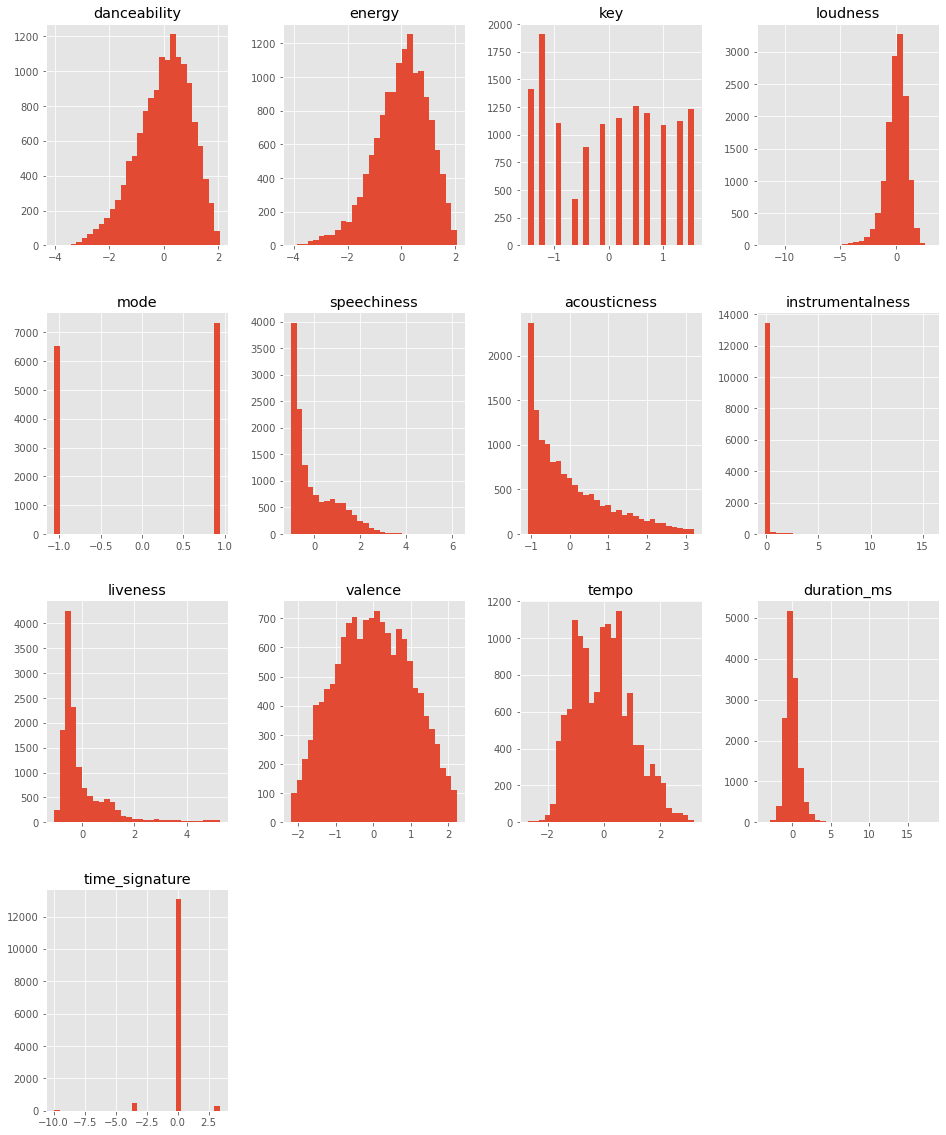

In [10]:
stand_scaled_data.hist(figsize=(16,20), bins=30)

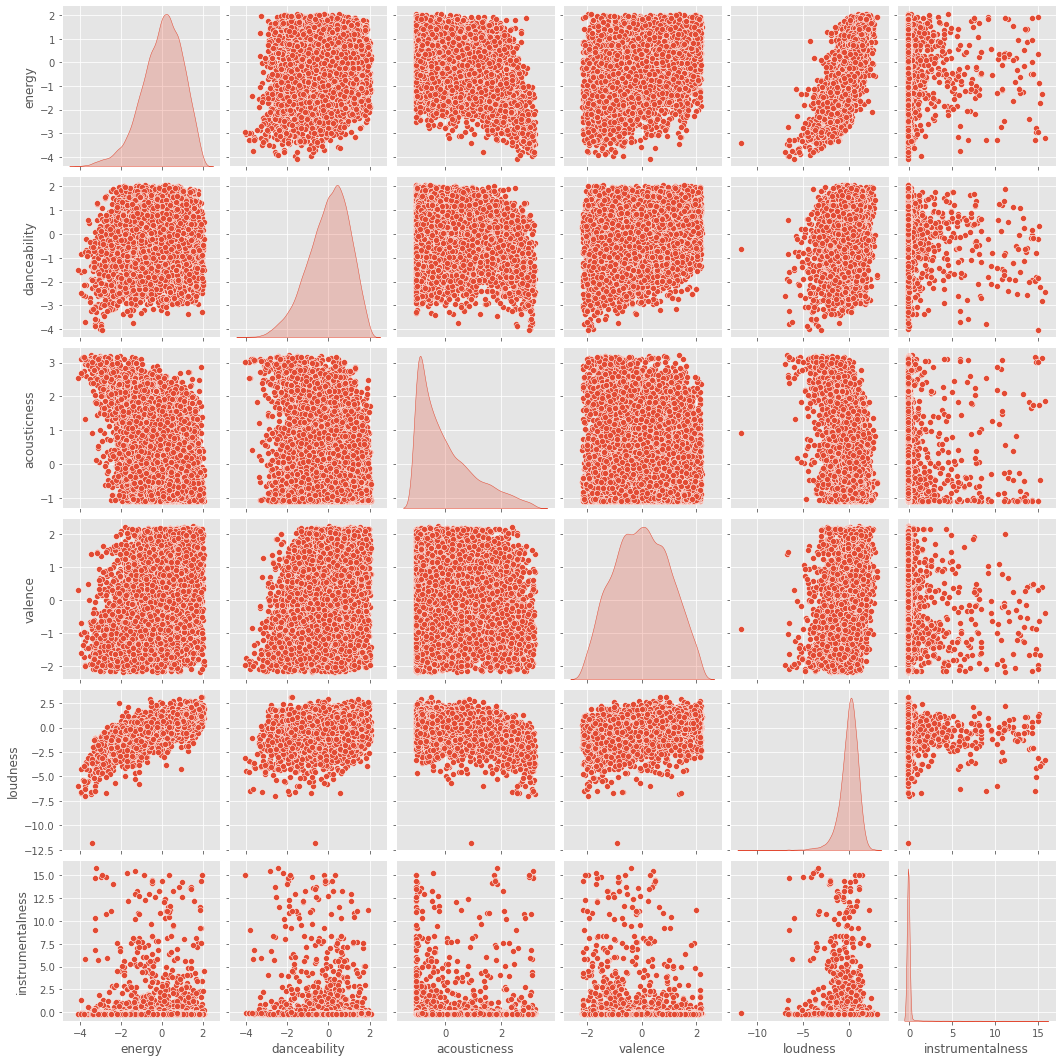

In [11]:
_ = sns.pairplot(stand_scaled_data[['energy', 'danceability', 'acousticness', 'valence', 'loudness', 'instrumentalness']],
             diag_kind='kde')

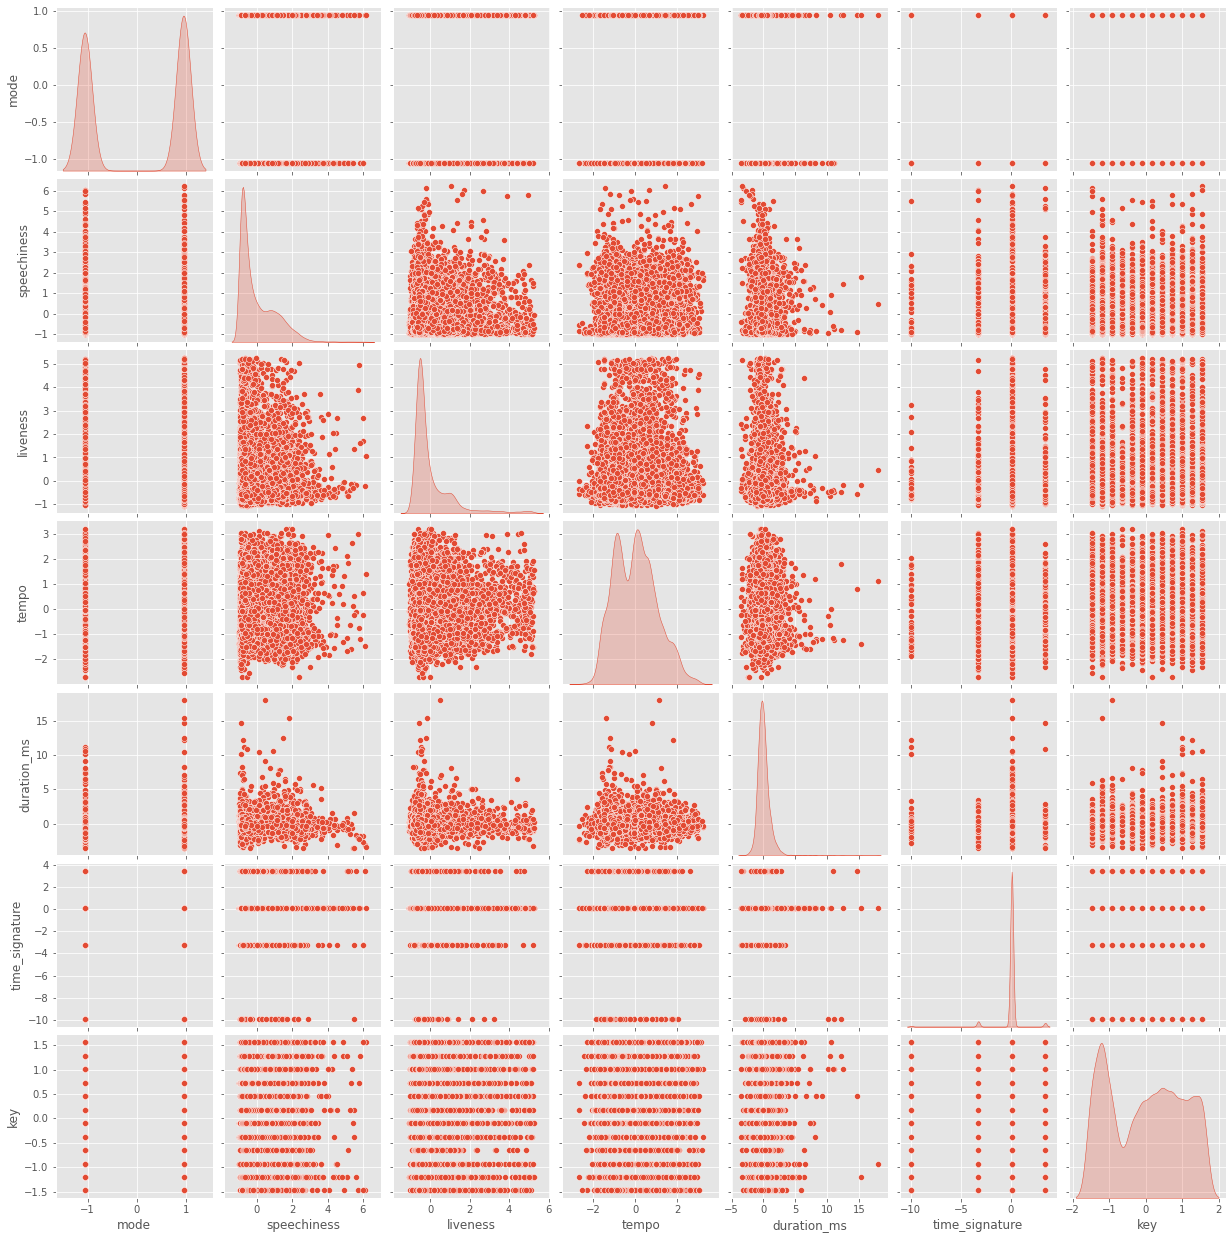

In [12]:
_ = sns.pairplot(stand_scaled_data[['mode', 'speechiness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key']],
                 diag_kind='kde')

### MinMax Scaler

In [13]:
minmax_scaled_data.describe()

danceability        energy           key      loudness          mode  \
count  13880.000000  13880.000000  13880.000000  13880.000000  13880.000000   
mean       0.660654      0.664549      0.486704      0.791855      0.528746   
std        0.164047      0.162382      0.330565      0.067333      0.499191   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.556845      0.564198      0.181818      0.758832      0.000000   
50%        0.678654      0.678936      0.545455      0.799800      1.000000   
75%        0.781903      0.783609      0.727273      0.835366      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  13880.000000  13880.000000      13880.000000  13880.000000   
mean       0.138584      0.250468          0.008248      0.167571   
std        0.138880      0.233690          0.062932      0.157971   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.028635      0.059152          0.000000      0.078635   
50%        0.079754      0.178066          0.000000      0.105431   
75%        0.230035      0.382292          0.000015      0.196125   
max        1.000000      1.000000          1.000000      1.000000   

            valence         tempo   duration_ms  time_signature  
count  13880.000000  13880.000000  13880.000000    13880.000000  
mean       0.494597      0.457978      0.163922        0.744759  
std        0.226623      0.169696      0.046457        0.074934  
min        0.000000      0.000000      0.000000        0.000000  
25%        0.322840      0.322784      0.136527        0.750000  
50%        0.492922      0.455545      0.158401        0.750000  
75%        0.668286      0.564930      0.183756        0.750000  
max        1.000000      1.000000      1.000000        1.000000

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

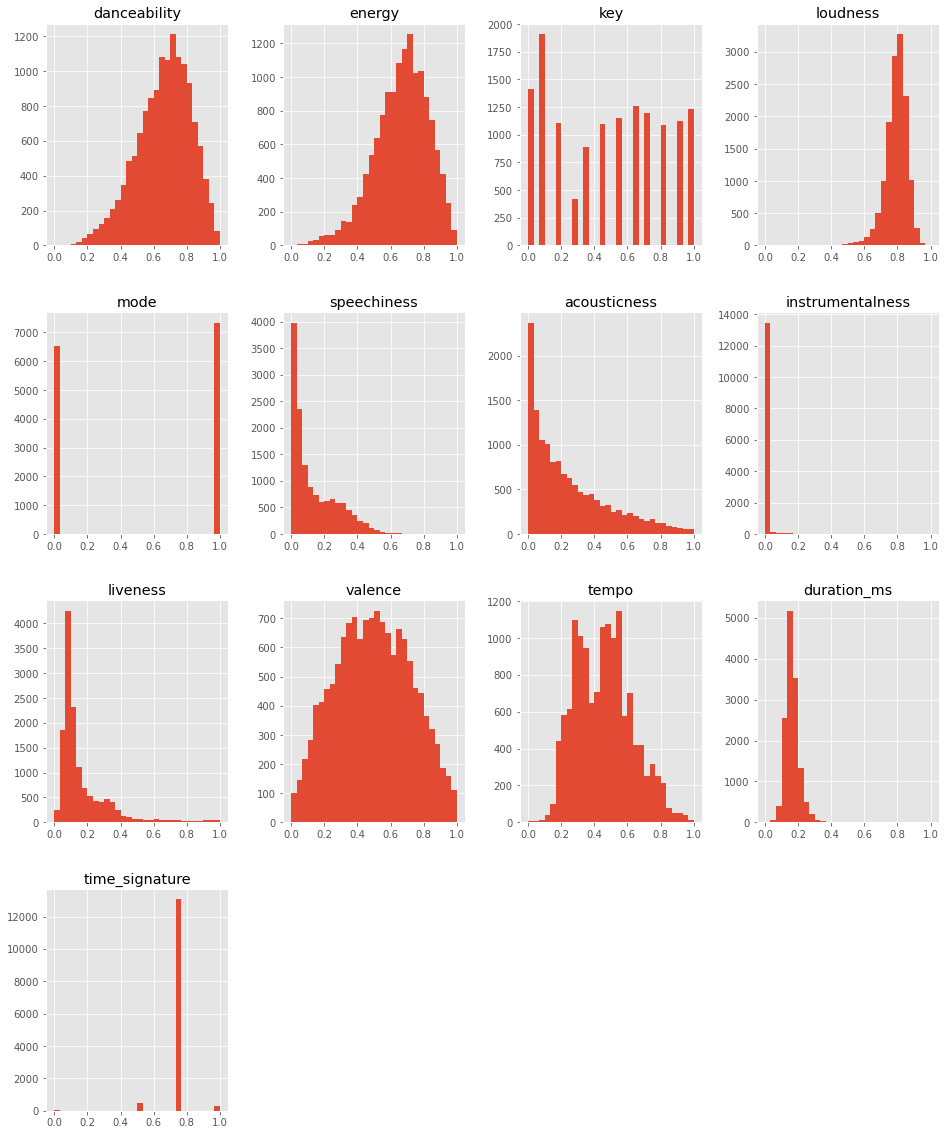

In [14]:
minmax_scaled_data.hist(figsize=(16,20), bins=30)

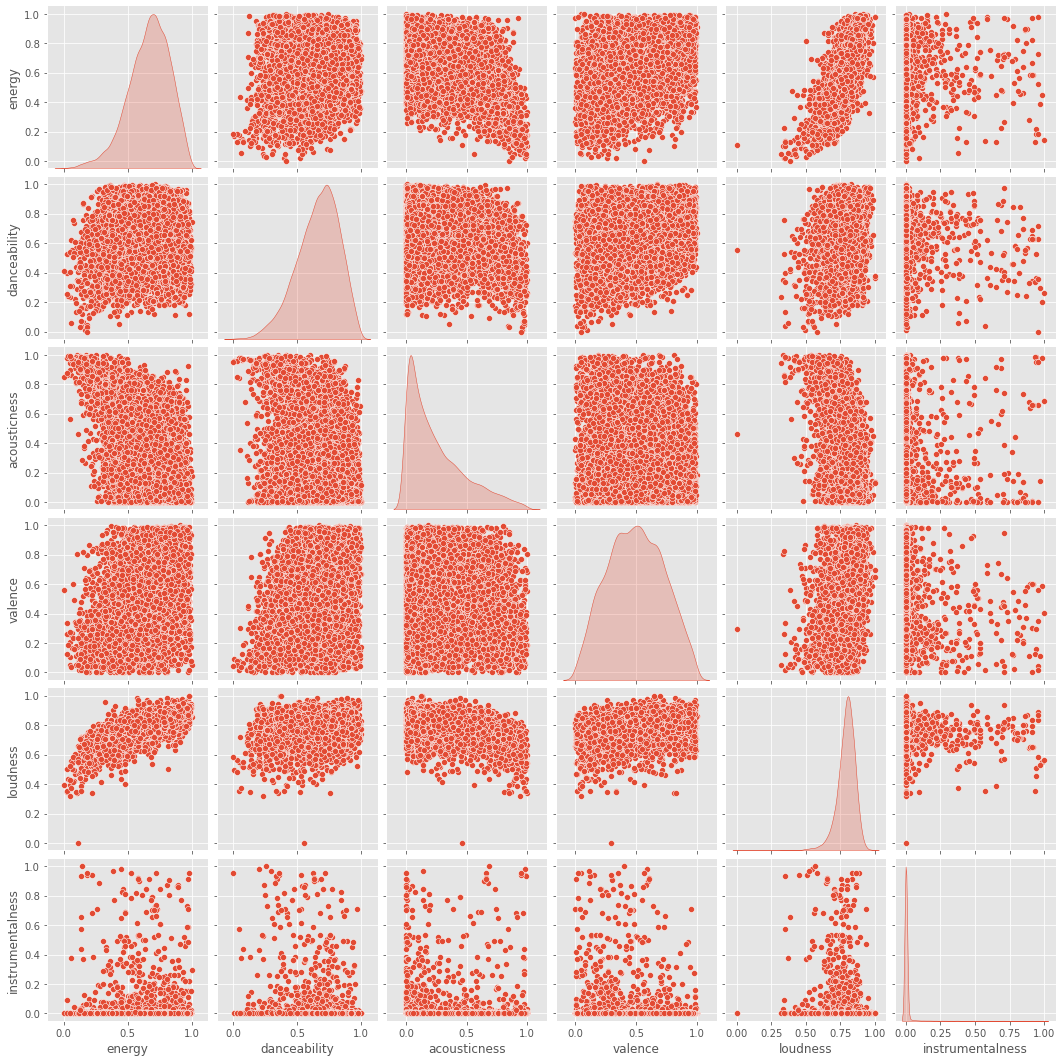

In [15]:
_ = sns.pairplot(minmax_scaled_data[['energy', 'danceability', 'acousticness', 'valence', 'loudness', 'instrumentalness']],
             diag_kind='kde')

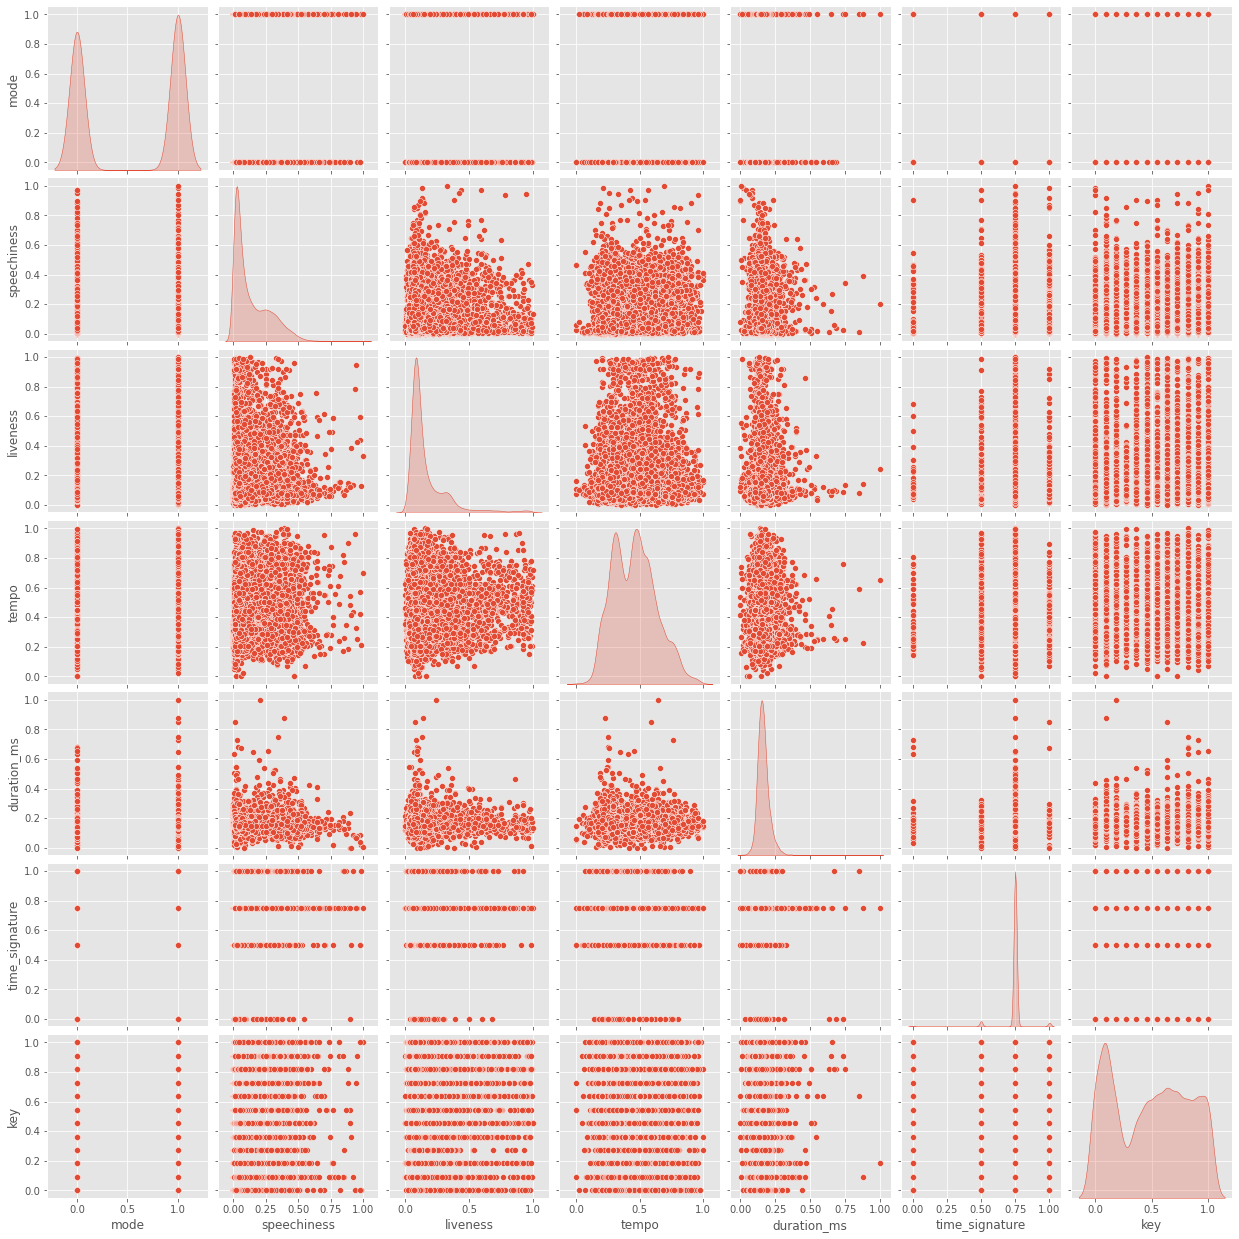

In [16]:
_ = sns.pairplot(minmax_scaled_data[['mode', 'speechiness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key']],
                 diag_kind='kde')

### Robust Scaler

In [17]:
robust_scaled_data.describe()

danceability        energy           key      loudness          mode  \
count  13880.000000  13880.000000  13880.000000  1.388000e+04  13880.000000   
mean      -0.079981     -0.065571     -0.107709 -1.038109e-01     -0.471254   
std        0.728910      0.740083      0.606036  8.797777e-01      0.499191   
min       -3.015464     -3.094358     -1.000000 -1.045020e+01     -1.000000   
25%       -0.541237     -0.522936     -0.666667 -5.352979e-01     -1.000000   
50%        0.000000      0.000000      0.000000  1.630640e-16      0.000000   
75%        0.458763      0.477064      0.333333  4.647021e-01      0.000000   
max        1.427835      1.463303      0.833333  2.615808e+00      0.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  13880.000000  13880.000000      13880.000000  13880.000000   
mean       0.292107      0.224059        561.584507      0.528894   
std        0.689572      0.723185       4284.723541      1.344554   
min       -0.395998     -0.551049          0.000000     -0.897368   
25%       -0.253818     -0.367995          0.000000     -0.228070   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.746182      0.632005          1.000000      0.771930   
max        4.569247      2.543587      68085.106383      7.614035   

            valence         tempo   duration_ms  time_signature  
count  13880.000000  13880.000000  13880.000000    13880.000000  
mean       0.004850      0.010046      0.116892       -0.020965  
std        0.656027      0.700798      0.983659        0.299734  
min       -1.426911     -1.881278     -3.353901       -3.000000  
25%       -0.492355     -0.548269     -0.463166        0.000000  
50%        0.000000      0.000000      0.000000        0.000000  
75%        0.507645      0.451731      0.536834        0.000000  
max        1.467890      2.248453     17.819521        1.000000

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

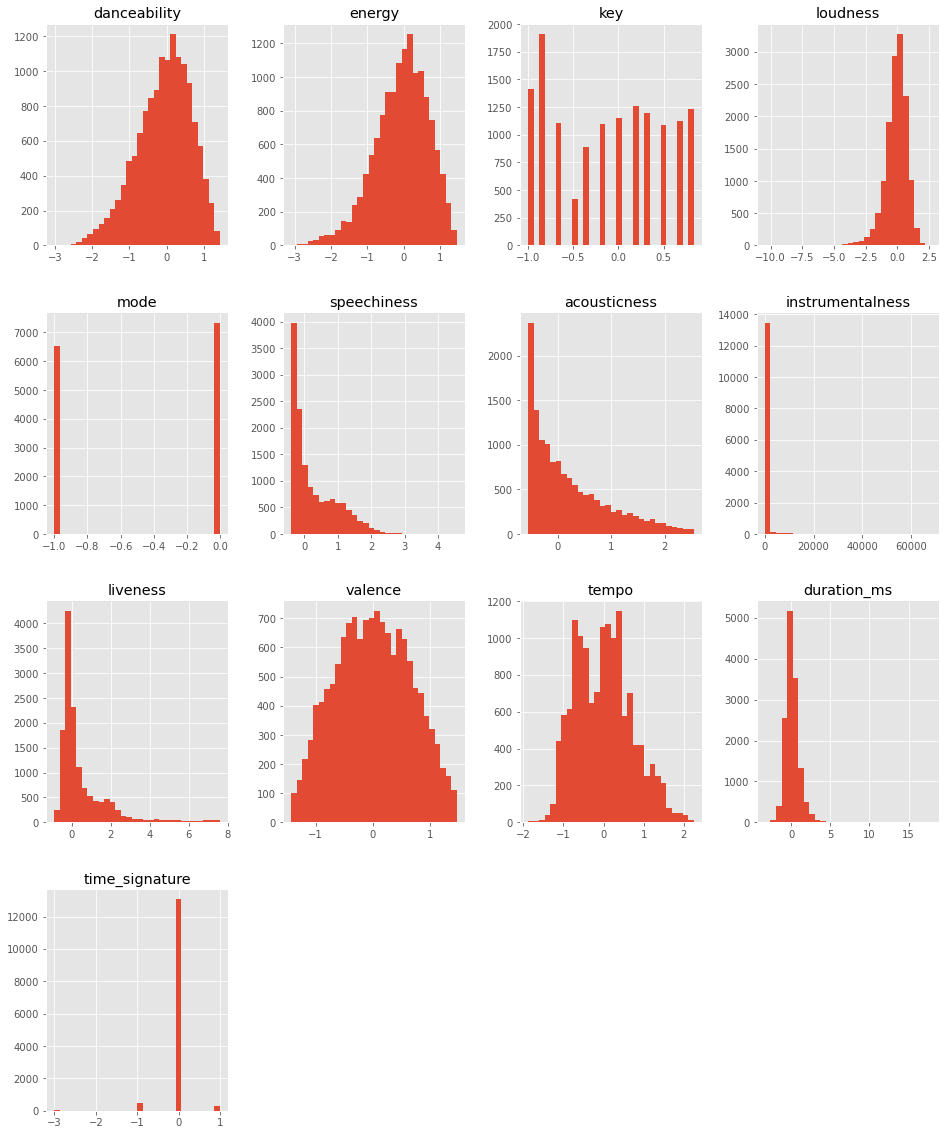

In [18]:
robust_scaled_data.hist(figsize=(16,20), bins=30)

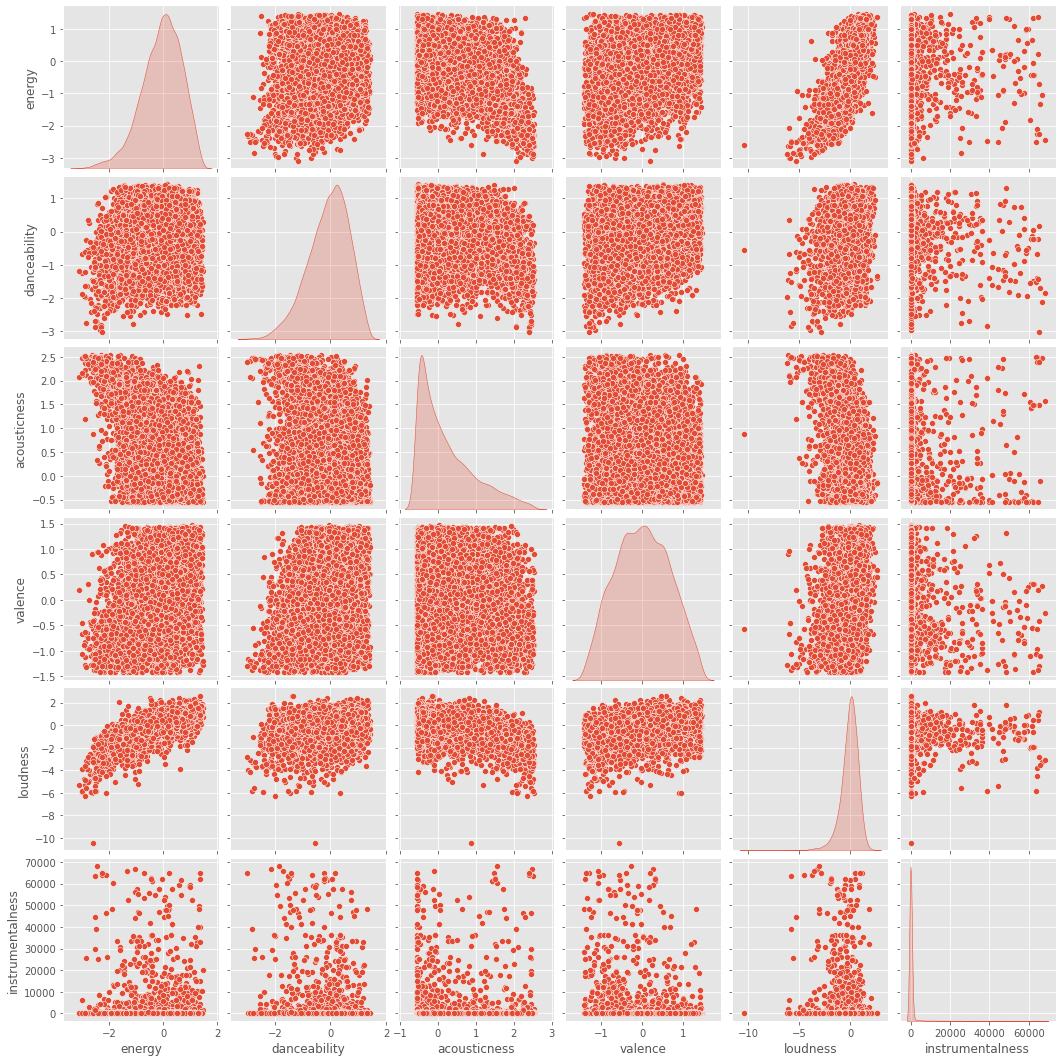

In [19]:
_ = sns.pairplot(robust_scaled_data[['energy', 'danceability', 'acousticness', 'valence', 'loudness', 'instrumentalness']],
             diag_kind='kde')

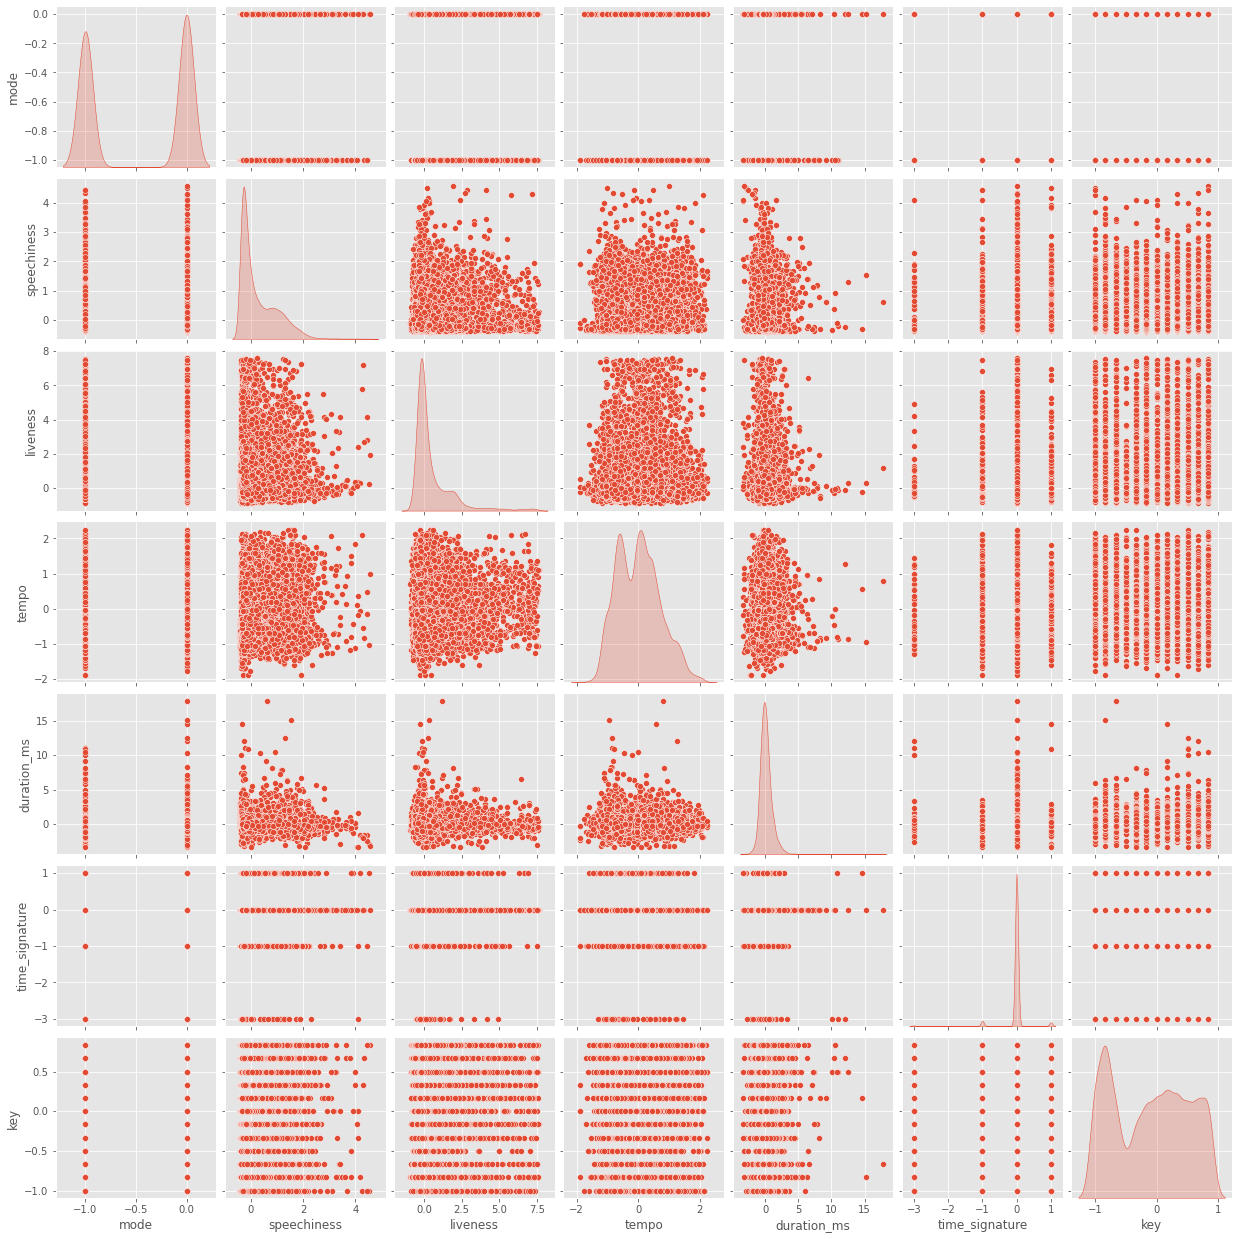

In [20]:
_ = sns.pairplot(robust_scaled_data[['mode', 'speechiness', 'liveness', 'tempo', 'duration_ms', 'time_signature', 'key']],
                 diag_kind='kde')